# Data Load

In [67]:
#!pip install factor_analyzer  
from factor_analyzer import FactorAnalyzer
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import math

data = pd.read_csv('인사이콘3_Data.csv')
data.head()

,RESPID,Q1.1,Q1.2,Q1.3,Q1.4,Q1.5,Q1.6,Q1.7,Q1.8,Q1.9,...,Q16.20,Q16.21,Q16.22,Q16.23,Q16.24,Q16.25,Q16.26,Q16.27,Q17,Q18
0,23822,5,1,5,5,5,5,5,3,5,...,4,4,4,4,5,4,4,4,0,1
1,224795,3,2,4,4,4,4,5,3,4,...,4,3,3,4,3,3,3,3,1,1
2,20952,3,1,4,4,5,4,4,2,4,...,5,3,3,5,2,4,3,5,1,0
3,5612,5,2,3,4,5,5,3,3,3,...,4,4,4,4,2,5,5,4,1,0
4,15016,4,2,4,5,5,4,5,4,5,...,4,4,5,5,3,4,5,4,0,0


In [68]:
#데이터 정규화
scaler = StandardScaler()
#Q16, Q17, Q18은 카테고리 변수로, 스케일링 제외
exception = ['Q16','Q17','Q18']
excepts = data[exception]
#Scaling 실행
data = pd.DataFrame(scaler.fit_transform(data.iloc[:,1:]),columns=data.columns[1:]).drop(exception,axis=1)
#exception 추가
data[exception] = excepts
data.head()

,Q1.1,Q1.2,Q1.3,Q1.4,Q1.5,Q1.6,Q1.7,Q1.8,Q1.9,Q1.10,...,Q16.21,Q16.22,Q16.23,Q16.24,Q16.25,Q16.26,Q16.27,Q16,Q17,Q18
0,1.186104,-1.861074,1.846000,1.353462,1.560841,1.268743,1.477733,-0.903108,1.964225,0.679611,...,0.115106,0.097700,0.015707,1.826135,0.406008,0.137651,0.439300,28,0,1
1,-1.254650,-0.874417,0.866411,0.133568,0.482588,0.055219,1.477733,-0.903108,1.034968,0.679611,...,-1.228438,-1.290331,0.015707,-0.336778,-0.739529,-1.188421,-0.740977,28,1,1
2,-1.254650,-1.861074,0.866411,0.133568,1.560841,0.055219,0.362994,-2.128008,1.034968,-0.393800,...,-1.228438,-1.290331,1.441031,-1.418234,0.406008,-1.188421,1.619576,48,1,0
3,1.186104,-0.874417,-0.113177,0.133568,1.560841,1.268743,-0.751746,-0.903108,0.105710,0.679611,...,0.115106,0.097700,0.015707,-1.418234,1.551545,1.463723,0.439300,40,1,0
4,-0.034273,-0.874417,0.866411,1.353462,1.560841,0.055219,1.477733,0.321792,1.964225,0.679611,...,0.115106,1.485731,1.441031,-0.336778,0.406008,1.463723,0.439300,19,0,0


# Part1

""" Part1의 문제, 우리가 여기서 해결하고자 하는 부분 설명 """

In [69]:
# Q1
Q1 = data.iloc[:,:29]
Q1.head()

,Q1.1,Q1.2,Q1.3,Q1.4,Q1.5,Q1.6,Q1.7,Q1.8,Q1.9,Q1.10,...,Q1.20,Q1.21,Q1.22,Q1.23,Q1.24,Q1.25,Q1.26,Q1.27,Q1.28,Q1.29
0,1.186104,-1.861074,1.846000,1.353462,1.560841,1.268743,1.477733,-0.903108,1.964225,0.679611,...,0.869481,1.032227,1.340882,1.403761,1.175582,1.325295,1.955336,-0.148794,0.703498,1.326973
1,-1.254650,-0.874417,0.866411,0.133568,0.482588,0.055219,1.477733,-0.903108,1.034968,0.679611,...,-0.162523,-0.343261,-0.012509,-0.550597,-0.143489,0.229131,1.003057,0.804640,0.703498,-0.041346
2,-1.254650,-1.861074,0.866411,0.133568,1.560841,0.055219,0.362994,-2.128008,1.034968,-0.393800,...,-0.162523,-1.718749,1.340882,0.426582,-0.143489,0.229131,1.955336,-0.148794,-0.314475,-0.041346
3,1.186104,-0.874417,-0.113177,0.133568,1.560841,1.268743,-0.751746,-0.903108,0.105710,0.679611,...,-0.162523,1.032227,-0.012509,1.403761,-1.462561,1.325295,1.003057,-0.148794,-0.314475,1.326973
4,-0.034273,-0.874417,0.866411,1.353462,1.560841,0.055219,1.477733,0.321792,1.964225,0.679611,...,0.869481,-0.343261,-0.012509,1.403761,-0.143489,0.229131,1.955336,0.804640,0.703498,-0.041346


## Choose the number of the factors

In [70]:
cov_mat = np.cov(Q1.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-1.19281114e-01  1.98841790e-01  8.10814788e-02  6.08749730e-02
  -3.13566260e-01 -3.44706948e-01 -6.38994054e-01 -8.36445915e-02
   1.52609733e-01  4.04321314e-01  2.30588486e-02  2.52222402e-02
   2.19367367e-02  3.18194989e-02  1.88539423e-03 -6.47144489e-02
  -1.83600291e-01 -6.15533400e-02 -7.71445782e-02 -4.83661783e-02
   3.35101905e-02  1.24177514e-01  7.30072792e-02  6.77413817e-02
   1.22080887e-01 -1.42177396e-01 -3.31335544e-02  2.89067998e-02
   2.40199660e-02]
 [ 1.31300741e-02 -1.43673136e-01  4.62837887e-01 -3.25580347e-01
  -5.73746812e-03 -1.77216060e-01 -1.47469281e-01  8.74686405e-02
  -2.77158648e-01 -4.88477028e-03  6.17102435e-02 -7.09255586e-02
  -1.67138445e-02  2.97344897e-01  6.96265169e-02  9.24777219e-02
  -6.99704444e-02 -7.60154459e-02  1.35712091e-01  1.14392044e-01
  -2.82602220e-01 -1.69455033e-01  2.89324380e-02 -3.17866207e-01
  -1.38084243e-01  1.81705599e-01 -1.27369490e-01 -7.39883578e-02
  -2.89725847e-01]
 [-2.22658469e-01 -1.689

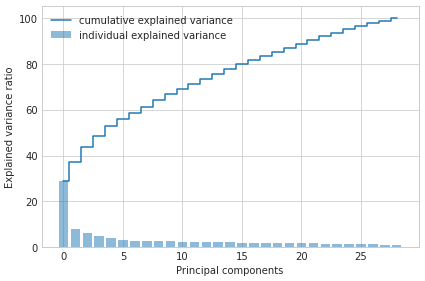

In [71]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    plt.bar(range(len(Q1.columns)), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(len(Q1.columns)), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [72]:
print(f'eigenvalue>1인 성분의 개수 {len([val for val in eig_vals if val>1])}')

eigenvalue>1인 성분의 개수 5


## FactorAnalysis

#### n=5일때 요인분석 진행

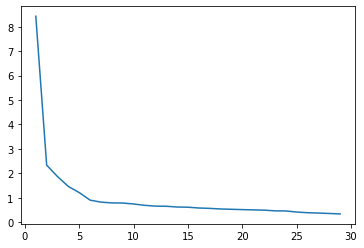

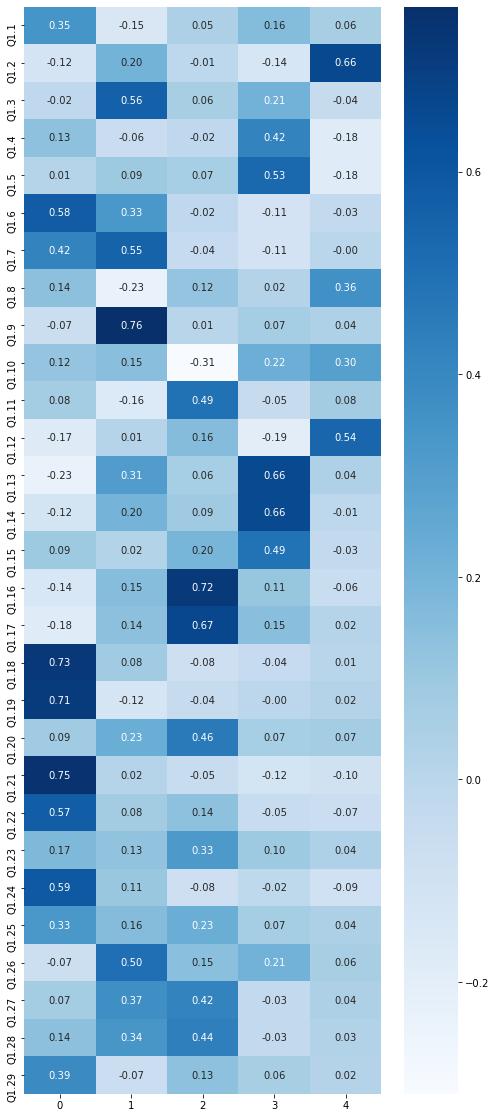

In [73]:
import seaborn as sns

x = Q1.copy()
fa = FactorAnalyzer(5, method="ml", rotation="promax")
fa.fit(x)
efa = pd.DataFrame(fa.loadings_, index=x.columns)
#Eigenvalue Plotting
ev, v = fa.get_eigenvalues()
ev
plt.plot(range(1,x.shape[1]+1),ev)
plt.show()

plt.figure(figsize=(8,20))
sns.heatmap(efa, cmap="Blues", annot=True, fmt='.2f')
plt.show()

5개의 그룹 완성

In [74]:
groups = [[] for _ in range(5)]
for i in range(len(efa)):
    groups[np.argmax(efa.iloc[i])].append(efa.index[i])
for i, group in enumerate(groups):
    print(f'Group {i}:')
    print(group)

Group 0:
['Q1.1', 'Q1.6', 'Q1.18', 'Q1.19', 'Q1.21', 'Q1.22', 'Q1.24', 'Q1.25', 'Q1.29']
Group 1:
['Q1.3', 'Q1.7', 'Q1.9', 'Q1.26']
Group 2:
['Q1.11', 'Q1.16', 'Q1.17', 'Q1.20', 'Q1.23', 'Q1.27', 'Q1.28']
Group 3:
['Q1.4', 'Q1.5', 'Q1.13', 'Q1.14', 'Q1.15']
Group 4:
['Q1.2', 'Q1.8', 'Q1.10', 'Q1.12']


각 그룹별 특성에 맞추어 임의로 명명

"""그룹별 피처의 특징 설명"""

In [75]:
new_Q1 = pd.DataFrame(fa.transform(x), columns=['Active','Achievement','Confidence','Tech','Basic'])
new_Q1.head()

,Active,Achievement,Confidence,Tech,Basic
0,1.603504,1.925999,0.588489,2.312300,-1.403017
1,0.183254,1.290527,-0.175544,0.822054,-0.744389
2,-0.412127,1.290524,0.255103,1.639500,-1.675826
3,0.722554,0.272728,0.468732,1.946347,-0.437991
4,0.666488,1.556704,1.426527,1.788969,-0.697391


### 가공된 Q1 데이터와 기존 데이터 연결

In [76]:
data = pd.concat([new_Q1, data.iloc[:,29:]],axis=1)
data.head()

,Active,Achievement,Confidence,Tech,Basic,Q2,Q2.Cluster,Q3,Q4,Q5,...,Q16.21,Q16.22,Q16.23,Q16.24,Q16.25,Q16.26,Q16.27,Q16,Q17,Q18
0,1.603504,1.925999,0.588489,2.312300,-1.403017,0.125422,0.587613,-0.215617,3.074166,1.780707,...,0.115106,0.097700,0.015707,1.826135,0.406008,0.137651,0.439300,28,0,1
1,0.183254,1.290527,-0.175544,0.822054,-0.744389,0.125422,0.587613,-0.215617,-0.397732,3.075726,...,-1.228438,-1.290331,0.015707,-0.336778,-0.739529,-1.188421,-0.740977,28,1,1
2,-0.412127,1.290524,0.255103,1.639500,-1.675826,0.125422,0.587613,1.204830,0.470243,3.075726,...,-1.228438,-1.290331,1.441031,-1.418234,0.406008,-1.188421,1.619576,48,1,0
3,0.722554,0.272728,0.468732,1.946347,-0.437991,0.125422,0.587613,-0.215617,0.904230,3.075726,...,0.115106,0.097700,0.015707,-1.418234,1.551545,1.463723,0.439300,40,1,0
4,0.666488,1.556704,1.426527,1.788969,-0.697391,0.125422,0.587613,-0.215617,0.470243,3.075726,...,0.115106,1.485731,1.441031,-0.336778,0.406008,1.463723,0.439300,19,0,0


# Part1+

## Q2-Q10

Q2~Q10에 대해서도 동일한 방식으로 요인분석 진행 및 차원 축소

### Q2-Q10 분리

In [77]:
# Q2 ~ Q10
Q2 = data.iloc[:,5:22]
# Q3는 예외적인 성격을 띠어 제외. 추후 병합됨.
Q2.drop('Q3', axis=1, inplace=True)
Q2.head()

,Q2,Q2.Cluster,Q4,Q5,Q6,Q7.1,Q7.2,Q7.3,Q7.4,Q8,Q9.1,Q9.2,Q9.3,Q9.4,Q9.5,Q10
0,0.125422,0.587613,3.074166,1.780707,6.293197,-0.208793,-0.898219,-0.709451,-0.768566,0.859211,-0.460576,0.557970,0.293257,0.689225,0.471260,1.218726
1,0.125422,0.587613,-0.397732,3.075726,0.203237,-0.208793,0.892490,0.175161,1.510797,-0.387288,-0.460576,0.557970,0.293257,1.544071,0.471260,-0.368565
2,0.125422,0.587613,0.470243,3.075726,-0.171529,-1.105488,-1.793573,0.175161,0.371116,0.859211,-0.460576,0.557970,0.293257,0.689225,0.471260,-0.368565
3,0.125422,0.587613,0.904230,3.075726,-0.077838,0.687902,-0.002865,-0.709451,0.371116,-0.387288,0.342648,-1.329666,0.293257,-0.165621,-1.434784,-0.368565
4,0.125422,0.587613,0.470243,3.075726,0.109546,-1.105488,-0.002865,-0.709451,-0.768566,-0.387288,-0.460576,-0.385848,-0.747009,-0.165621,-0.481762,-0.368565


### Q2-Q10의 축소 차원 수 결정

#### Eigenvalue 확인

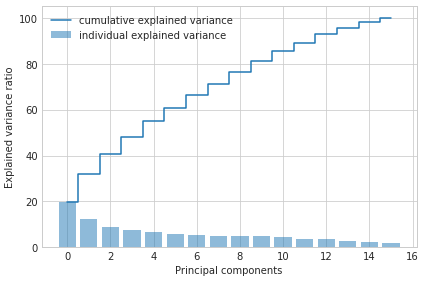

In [78]:
cov_mat = np.cov(Q2.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    plt.bar(range(len(Q2.columns)), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(len(Q2.columns)), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [79]:
print(f'eigenvalue>1인 성분의 개수 {len([val for val in eig_vals if val>1])}')

eigenvalue>1인 성분의 개수 5


#### n=5일때 그룹 확인

Group 0:
['Q2', 'Q2.Cluster']
Group 1:
['Q4', 'Q5', 'Q6', 'Q7.4', 'Q9.3', 'Q9.5']
Group 2:
['Q9.2', 'Q9.4']
Group 3:
['Q7.2', 'Q7.3']
Group 4:
['Q7.1', 'Q8', 'Q9.1', 'Q10']


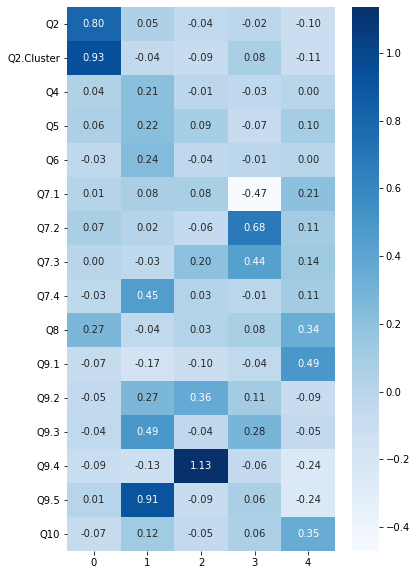

In [80]:
items = Q2.columns.tolist()
fa = FactorAnalyzer(n_factors=5, method="ml", rotation="promax")
fa.fit(Q2[items])

efa_result= pd.DataFrame(fa.loadings_, index=items)
plt.figure(figsize=(6,10))
sns.heatmap(efa_result, cmap="Blues", annot=True, fmt='.2f')

groups = [[] for _ in range(5)]
for i in range(len(efa_result)):
    groups[np.argmax(efa_result.iloc[i])].append(efa_result.index[i])
for i, group in enumerate(groups):
    print(f'Group {i}:')
    print(group)

#### n=6일때 그룹 확인

Group 0:
['Q7.4', 'Q9.3', 'Q9.5']
Group 1:
['Q2', 'Q2.Cluster']
Group 2:
['Q9.2', 'Q9.4']
Group 3:
['Q7.2', 'Q7.3']
Group 4:
['Q7.1', 'Q8', 'Q9.1', 'Q10']
Group 5:
['Q4', 'Q5', 'Q6']


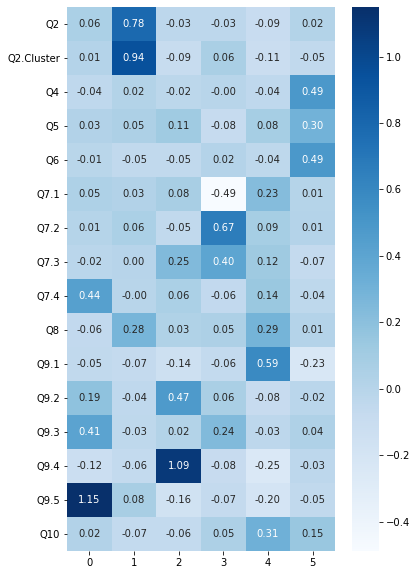

In [81]:
items = Q2.columns.tolist()
fa = FactorAnalyzer(n_factors=6, method="ml", rotation="promax")
fa.fit(Q2[items])

efa_result= pd.DataFrame(fa.loadings_, index=items)
plt.figure(figsize=(6,10))
sns.heatmap(efa_result, cmap="Blues", annot=True, fmt='.2f')

groups = [[] for _ in range(6)]
for i in range(len(efa_result)):
    groups[np.argmax(efa_result.iloc[i])].append(efa_result.index[i])
for i, group in enumerate(groups):
    print(f'Group {i}:')
    print(group)

### Q2-Q10 차원축소 실행

In [82]:
# Q2-Q10 축소
new_Q2 = pd.DataFrame(fa.transform(Q2), columns=['Entertaining','Water_Activity','Own','With_Family','Fishing_Alone','Character'])
new_Q2.head()

,Entertaining,Water_Activity,Own,With_Family,Fishing_Alone,Character
0,0.695588,0.646740,0.808929,-0.263061,0.467017,3.418597
1,0.729945,0.575781,1.468837,0.589600,0.320801,0.769381
2,0.500457,0.565391,0.712958,-0.333499,0.093021,0.795422
3,-1.140036,0.586112,-0.215490,-0.616951,0.609455,0.551951
4,-0.518370,0.424146,-0.264415,-0.131741,-0.342173,0.536142


### 기존 데이터와 병합

In [83]:
# Q2-Q10 차원축소와 결합
_data = pd.concat([data.iloc[:,:5], new_Q2],axis=1)
_data = pd.concat([_data, data.iloc[:,22:]], axis=1)
# Q3 병합
_data['Q3'] = data['Q3']
data = _data
data.head()

,Active,Achievement,Confidence,Tech,Basic,Entertaining,Water_Activity,Own,With_Family,Fishing_Alone,...,Q16.22,Q16.23,Q16.24,Q16.25,Q16.26,Q16.27,Q16,Q17,Q18,Q3
0,1.603504,1.925999,0.588489,2.312300,-1.403017,0.695588,0.646740,0.808929,-0.263061,0.467017,...,0.097700,0.015707,1.826135,0.406008,0.137651,0.439300,28,0,1,-0.215617
1,0.183254,1.290527,-0.175544,0.822054,-0.744389,0.729945,0.575781,1.468837,0.589600,0.320801,...,-1.290331,0.015707,-0.336778,-0.739529,-1.188421,-0.740977,28,1,1,-0.215617
2,-0.412127,1.290524,0.255103,1.639500,-1.675826,0.500457,0.565391,0.712958,-0.333499,0.093021,...,-1.290331,1.441031,-1.418234,0.406008,-1.188421,1.619576,48,1,0,1.204830
3,0.722554,0.272728,0.468732,1.946347,-0.437991,-1.140036,0.586112,-0.215490,-0.616951,0.609455,...,0.097700,0.015707,-1.418234,1.551545,1.463723,0.439300,40,1,0,-0.215617
4,0.666488,1.556704,1.426527,1.788969,-0.697391,-0.518370,0.424146,-0.264415,-0.131741,-0.342173,...,1.485731,1.441031,-0.336778,0.406008,1.463723,0.439300,19,0,0,-0.215617


## Q16 

### Q16 분리

In [84]:
Q16 = data.iloc[:,-31:-2]
Q16[exception] = data[exception]
Q16.head()

,Q16.1,Q16.2,Q16.3,Q16.4,Q16.5,Q16.6,Q16.7,Q16.8,Q16.9,Q16.10,...,Q16.21,Q16.22,Q16.23,Q16.24,Q16.25,Q16.26,Q16.27,Q16,Q17,Q18
0,-0.639963,0.509553,0.355449,-0.950890,0.363516,0.222594,0.114242,0.119318,0.112943,0.199366,...,0.115106,0.097700,0.015707,1.826135,0.406008,0.137651,0.439300,28,0,1
1,-0.639963,-0.649196,0.355449,-0.950890,-0.874462,-1.014870,0.114242,0.119318,1.383774,0.199366,...,-1.228438,-1.290331,0.015707,-0.336778,-0.739529,-1.188421,-0.740977,28,1,1
2,0.331551,0.509553,-0.902259,0.306681,-0.874462,1.460058,1.355030,0.119318,1.383774,1.390056,...,-1.228438,-1.290331,1.441031,-1.418234,0.406008,-1.188421,1.619576,48,1,0
3,0.331551,0.509553,0.355449,0.306681,1.601494,0.222594,1.355030,0.119318,1.383774,1.390056,...,0.115106,0.097700,0.015707,-1.418234,1.551545,1.463723,0.439300,40,1,0
4,1.303066,1.668301,1.613157,1.564253,1.601494,0.222594,-3.608120,1.410248,1.383774,0.199366,...,0.115106,1.485731,1.441031,-0.336778,0.406008,1.463723,0.439300,19,0,0


### 기업별 mean 계산

In [93]:
Q16 = Q16.groupby('Q16').mean().reset_index().drop(['Q17','Q18'],axis=1)
Q16.head()

,Q16,Q16.1,Q16.2,Q16.3,Q16.4,Q16.5,Q16.6,Q16.7,Q16.8,Q16.9,...,Q16.18,Q16.19,Q16.20,Q16.21,Q16.22,Q16.23,Q16.24,Q16.25,Q16.26,Q16.27
0,1,0.061280,0.161057,-0.278133,0.013563,-0.241511,-0.158880,-0.184293,-0.084513,0.084277,...,-0.140609,0.118214,-0.088436,-0.076829,0.087264,0.101441,-0.157890,-0.283037,-0.061758,-0.146402
1,2,-0.478044,-0.456071,-1.111877,-0.322105,-0.255473,-0.396138,-0.506151,-0.741302,-0.946084,...,-0.064107,-0.518003,-0.195991,-0.556666,-0.133638,-0.221847,0.023708,0.215085,-0.304373,0.045874
2,3,0.036822,-0.111050,-0.073208,0.174801,-0.030597,-0.069392,-0.113468,0.128988,0.098664,...,-0.061674,0.008529,0.101752,0.220778,0.066508,0.095782,-0.028947,-0.001580,0.003554,-0.011593
3,4,-0.622299,-0.333173,-0.056165,-0.287807,-0.019132,-0.024899,-0.088796,-0.044982,-0.118118,...,-0.083787,-0.094010,-0.242892,0.237247,-0.356565,-0.087952,0.272770,-0.406282,-0.079342,-0.204488
4,5,0.124940,0.242149,0.031063,0.084757,-0.062214,0.065811,0.080556,0.253668,-0.030817,...,0.246417,0.172390,0.102181,-0.030799,0.091419,0.009258,0.186823,0.146837,0.119650,-0.068059


eigenvalue 1보다 큰 성분의 개수 1


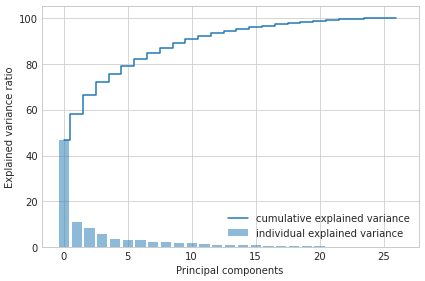

In [94]:
cov_mat = np.cov(Q16.iloc[:,1:].T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(len(Q16.columns)-1), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(len(Q16.columns)-1), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

print(f'eigenvalue 1보다 큰 성분의 개수 {len([val for val in eig_vals if val>1])}')

임의로 개수 결정

In [97]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)

df_pca = pca.fit_transform(Q16.iloc[:,1:])

Q16_reducted = pd.concat([Q16[['Q16']],pd.DataFrame(df_pca, columns=['equi1','equi2','equi3','equi4'])],axis=1)
Q16_reducted.head()

,Q16,equi1,equi2,equi3,equi4
0,1,0.624837,0.299360,0.176775,0.538344
1,2,1.434434,-0.142963,-1.098078,-0.658811
2,3,-0.157446,-0.320290,0.088960,0.140804
3,4,0.632833,-0.401380,-0.161733,-0.428492
4,5,-0.088936,0.502584,0.223715,0.260171


In [98]:
temp = data[exception].merge(Q16_reducted)
temp.head()

,Q16,Q17,Q18,equi1,equi2,equi3,equi4
0,28,0,1,-0.719049,-0.14722,-0.026881,-0.124621
1,28,1,1,-0.719049,-0.14722,-0.026881,-0.124621
2,28,0,1,-0.719049,-0.14722,-0.026881,-0.124621
3,28,0,1,-0.719049,-0.14722,-0.026881,-0.124621
4,28,0,1,-0.719049,-0.14722,-0.026881,-0.124621


In [99]:
temp['Q17'] = temp['Q17'].apply(lambda x: -1 if x==0 else 1)
temp['Q18'] = temp['Q18'].apply(lambda x: -1 if x==0 else 1)
temp['preference'] = temp.apply(lambda x: x['Q17']+x['Q18'], axis=1)
temp['preference'] = scaler.fit_transform(temp[['preference']])
display(temp.head())

for idx in ['equi'+str(i) for i in range(1,5)]:
    temp[idx] *= temp['preference']
temp.head()

,Q16,Q17,Q18,equi1,equi2,equi3,equi4,preference
0,28,-1,1,-0.719049,-0.14722,-0.026881,-0.124621,0.229022
1,28,1,1,-0.719049,-0.14722,-0.026881,-0.124621,1.602667
2,28,-1,1,-0.719049,-0.14722,-0.026881,-0.124621,0.229022
3,28,-1,1,-0.719049,-0.14722,-0.026881,-0.124621,0.229022
4,28,-1,1,-0.719049,-0.14722,-0.026881,-0.124621,0.229022


,Q16,Q17,Q18,equi1,equi2,equi3,equi4,preference
0,28,-1,1,-0.164678,-0.033717,-0.006156,-0.028541,0.229022
1,28,1,1,-1.152395,-0.235945,-0.043081,-0.199726,1.602667
2,28,-1,1,-0.164678,-0.033717,-0.006156,-0.028541,0.229022
3,28,-1,1,-0.164678,-0.033717,-0.006156,-0.028541,0.229022
4,28,-1,1,-0.164678,-0.033717,-0.006156,-0.028541,0.229022


### 기존 데이터와 병합

In [105]:
data.drop(['Q16.'+str(i) for i in range(1,28)], axis=1, inplace=True)
data.drop(exception, axis=1, inplace=True)
data = pd.concat([data, temp[['equi1','equi2','equi3','equi4']]],axis=1)
data.head()

,Active,Achievement,Confidence,Tech,Basic,Entertaining,Water_Activity,Own,With_Family,Fishing_Alone,...,Q11,Q12,Q13,Q14,Q15,Q3,equi1,equi2,equi3,equi4
0,1.603504,1.925999,0.588489,2.312300,-1.403017,0.695588,0.646740,0.808929,-0.263061,0.467017,...,1.107807,1.200646,1.629578,-0.662915,-0.474762,-0.215617,-0.164678,-0.033717,-0.006156,-0.028541
1,0.183254,1.290527,-0.175544,0.822054,-0.744389,0.729945,0.575781,1.468837,0.589600,0.320801,...,1.107807,0.770073,1.629578,-0.662915,-1.346503,-0.215617,-1.152395,-0.235945,-0.043081,-0.199726
2,-0.412127,1.290524,0.255103,1.639500,-1.675826,0.500457,0.565391,0.712958,-0.333499,0.093021,...,-0.902684,0.124213,1.629578,-0.662915,-1.346503,1.204830,-0.164678,-0.033717,-0.006156,-0.028541
3,0.722554,0.272728,0.468732,1.946347,-0.437991,-1.140036,0.586112,-0.215490,-0.616951,0.609455,...,-0.902684,-0.091074,1.629578,-0.662915,-1.346503,-0.215617,-0.164678,-0.033717,-0.006156,-0.028541
4,0.666488,1.556704,1.426527,1.788969,-0.697391,-0.518370,0.424146,-0.264415,-0.131741,-0.342173,...,-0.902684,-0.091074,1.629578,-0.662915,-1.346503,-0.215617,-0.164678,-0.033717,-0.006156,-0.028541


## 최종 정제된 데이터

In [106]:
data.head()

,Active,Achievement,Confidence,Tech,Basic,Entertaining,Water_Activity,Own,With_Family,Fishing_Alone,...,Q11,Q12,Q13,Q14,Q15,Q3,equi1,equi2,equi3,equi4
0,1.603504,1.925999,0.588489,2.312300,-1.403017,0.695588,0.646740,0.808929,-0.263061,0.467017,...,1.107807,1.200646,1.629578,-0.662915,-0.474762,-0.215617,-0.164678,-0.033717,-0.006156,-0.028541
1,0.183254,1.290527,-0.175544,0.822054,-0.744389,0.729945,0.575781,1.468837,0.589600,0.320801,...,1.107807,0.770073,1.629578,-0.662915,-1.346503,-0.215617,-1.152395,-0.235945,-0.043081,-0.199726
2,-0.412127,1.290524,0.255103,1.639500,-1.675826,0.500457,0.565391,0.712958,-0.333499,0.093021,...,-0.902684,0.124213,1.629578,-0.662915,-1.346503,1.204830,-0.164678,-0.033717,-0.006156,-0.028541
3,0.722554,0.272728,0.468732,1.946347,-0.437991,-1.140036,0.586112,-0.215490,-0.616951,0.609455,...,-0.902684,-0.091074,1.629578,-0.662915,-1.346503,-0.215617,-0.164678,-0.033717,-0.006156,-0.028541
4,0.666488,1.556704,1.426527,1.788969,-0.697391,-0.518370,0.424146,-0.264415,-0.131741,-0.342173,...,-0.902684,-0.091074,1.629578,-0.662915,-1.346503,-0.215617,-0.164678,-0.033717,-0.006156,-0.028541


In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2813 entries, 0 to 2812
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Active          2813 non-null   float64
 1   Achievement     2813 non-null   float64
 2   Confidence      2813 non-null   float64
 3   Tech            2813 non-null   float64
 4   Basic           2813 non-null   float64
 5   Entertaining    2813 non-null   float64
 6   Water_Activity  2813 non-null   float64
 7   Own             2813 non-null   float64
 8   With_Family     2813 non-null   float64
 9   Fishing_Alone   2813 non-null   float64
 10  Character       2813 non-null   float64
 11  Q11             2813 non-null   float64
 12  Q12             2813 non-null   float64
 13  Q13             2813 non-null   float64
 14  Q14             2813 non-null   float64
 15  Q15             2813 non-null   float64
 16  Q3              2813 non-null   float64
 17  equi1           2813 non-null   f

- 82개 columns에서 20개로 축소!